In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import time
import _pickle as pickle
np.random.seed(42)

## trying to simulate for beer game for similar range of incoming order, random incoming delivery and week lag of 1

<b>Environment</b>: Supply Chain <br>
<b>States</b>: Current inventory, backlog<br>
<b>Agent</b>: Warehouse<br>
<b>Action</b>: Outgoing order<br>
<b>Reward</b>: Total Supply Chain Cost<br>
<b>Total Cost</b>: max(200, holding_cost\*current_inventory) + backlog_cost\*back_log<br>
<b>Algorithm</b>: Q-Learning

<b>State</b>: inventory level - backlog level<br>
<b>States</b>:[-30, 30]<br>
<b>maximum inventory possible</b>: 1000<br>
<b>Incoming orders</b> follow a normal (gaussian) distribution with mean 400 and sd 60<br>
<b>Action</b> : [0, 10, 50, 100, 200, 300, 400, 500, 600]<br>
<b>holding_cost</b>: 0.5<br>
<b>backlog_cost</b>: 1<br>
<b>minimum cost</b>: 200<br>
<b>Incoming Deliveres</b>: vary similar to manufacturing plant production plan<br>
<b>Episodes</b>:2000

## environment class

In [2]:
class SupplyChain:
    def __init__(self, inventory_a, backlog_a, incoming_delivery_a,inventory_b, backlog_b, incoming_delivery_b):
        # initializing various parameters of supply chain
        self.inventory_a = [inventory_a, -1]
        self.backlog_a = [backlog_a, -1]
        self.incoming_delivery_a = incoming_delivery_a
        self.outgoing_delivery_a = -1
        self.incoming_order_a = -1
        self.outgoing_order_a = []
        
        self.inventory_b = [inventory_b, -1]
        self.backlog_b = [backlog_b, -1]
        self.incoming_delivery_b = incoming_delivery_b
        self.outgoing_delivery_b = -1
        self.incoming_order_b = -1
        self.outgoing_order_b = []
        
        
        
        
        for i in range(time_delay):
            self.outgoing_order_a.append(10)
            self.outgoing_order_b.append(10)
        self.week = 0
        
        self.upstream_pending_delivery_a = 0
        self.upstream_pending_delivery_b = 0
        self.total_cost = 0
        
        
    def set_cost(self, inventory_cost, backlog_cost):
        # set cost parameters of supply chain
        self.inventory_cost = inventory_cost
        self.backlog_cost = backlog_cost
        
        
    def get_reward(self):
        # reward of a particular state
        x1=-(max(self.inventory_a[1]*self.inventory_cost, min_cost_a) + self.backlog_a[1]*self.backlog_cost)
        x2=-(max(self.inventory_b[1]*self.inventory_cost, min_cost_b) + self.backlog_b[1]*self.backlog_cost)
        return x1+x2

        
    def current_state(self):
        # get the current state of environment. Set the current inventory and backlog value 
        # as per their actual value to a category between -n_bins and +n_bins
        # it also makes sure that min state value is -n_bins and max state value is +n_bins
        x_a = min(n_bins, max(-n_bins, int((self.inventory_a[1] - self.backlog_a[1])*n_bins/max_inventory_a)))
        x_b = min(n_bins, max(-n_bins, int((self.inventory_b[1] - self.backlog_b[1])*n_bins/max_inventory_b)))
        return [x_a,x_b]
    
    
    def update(self):
        # get outgoing_delivery for current state, inventory & backlog of next state
        if self.incoming_order_a >= self.inventory_a[0] + self.incoming_delivery_a:
            self.outgoing_delivery_a = self.inventory_a[0] + self.incoming_delivery_a
            self.backlog_a[1] = self.backlog_a[0] + self.incoming_order_a - self.outgoing_delivery_a
            self.inventory_a[1] = 0
        elif self.incoming_order_a <= self.inventory_a[0] + self.incoming_delivery_a - self.backlog_a[0]:
            self.outgoing_delivery_a = self.incoming_order_a + self.backlog_a[0]
            self.backlog_a[1] = 0
            self.inventory_a[1] = self.inventory_a[0] + self.incoming_delivery_a - self.outgoing_delivery_a
        elif self.incoming_order_a > self.inventory_a[0] + self.incoming_delivery_a - self.backlog_a[0]:
            self.outgoing_delivery_a = self.inventory_a[0] + self.incoming_delivery_a
            self.backlog_a[1] = self.backlog_a[0] + self.incoming_order_a - self.outgoing_delivery_a
            self.inventory_a[1] = 0
    
        # get outgoing_delivery for current state, inventory & backlog of next state
        if self.incoming_order_b >= self.inventory_b[0] + self.incoming_delivery_b:
            self.outgoing_delivery_b = self.inventory_b[0] + self.incoming_delivery_b
            self.backlog_b[1] = self.backlog_b[0] + self.incoming_order_b - self.outgoing_delivery_b
            self.inventory_b[1] = 0
        elif self.incoming_order_b <= self.inventory_b[0] + self.incoming_delivery_b - self.backlog_b[0]:
            self.outgoing_delivery_b = self.incoming_order_b + self.backlog_b[0]
            self.backlog_b[1] = 0
            self.inventory_b[1] = self.inventory_b[0] + self.incoming_delivery_b - self.outgoing_delivery_b
        elif self.incoming_order_b > self.inventory_b[0] + self.incoming_delivery_b - self.backlog_b[0]:
            self.outgoing_delivery_b = self.inventory_b[0] + self.incoming_delivery_b
            self.backlog_b[1] = self.backlog_b[0] + self.incoming_order_b - self.outgoing_delivery_b
            self.inventory_b[1] = 0
    
    def clock_tick(self):
        # modify the state of the environment as per the action taken by the agent
        
        # get cost of current state for the given action(outgoing_order)
        cost = self.get_reward()
        
        # get incoming delivery for next cycle
        if random_incoming_delivery:
            # get random incoming delivery
            self.incoming_delivery_a, self.upstream_pending_delivery_a = random_delivery(self.outgoing_order_a[0], self.upstream_pending_delivery_a)
            self.incoming_delivery_b, self.upstream_pending_delivery_b = random_delivery(self.outgoing_order_b[0], self.upstream_pending_delivery_b)
        else:
            # set incoming delivery
            self.incoming_delivery_a = self.outgoing_order_a[0]
            self.incoming_delivery_b = self.outgoing_order_b[0]
            
        # update next week values to current week
        self.backlog_a[0] = self.backlog_a[1]
        self.inventory_a[0] = self.inventory_a[1]
        self.backlog_b[0] = self.backlog_b[1]
        self.inventory_b[0] = self.inventory_b[1]
        # update outgoing order based on time delay
        for i in range(time_delay-1):
            self.outgoing_order_a[i] = self.outgoing_order_a[i+1]
            self.outgoing_order_b[i] = self.outgoing_order_b[i+1]
        # increment week to take the current state to next state or time period
        self.week+=1
        
        # return the cost of current state of environment
        return cost

    
    def year_over(self):
        # check based on the number of weeks if year end is reached
        return self.week == number_of_weeks
    
    
    def all_states(self):
        # get all the possible states of the environment
        return list(range(-n_bins, n_bins+1))
    
    
    def update_data_log(self, warehouse_log):
        # update the dataframe for various parameters of supply chain 
        
        # set total cost by adding all costs for the episode
        self.total_cost += self.get_reward()

        # append values of current state parameters in dataframe
        warehouse_log = warehouse_log.append({
                            'Current_Inventory_a':self.inventory_a[0],
                            'Backlog_Orders_a':self.backlog_a[0],
                            'Incoming_Delivery_a':self.incoming_delivery_a,
                            'Outgoing_Delivery_a':self.outgoing_delivery_a,
                            'Outgoing_Order_a':self.outgoing_order_a[time_delay-1],
                            'Incoming_Order_a':self.incoming_order_a,
                            'Closing_Inventory_a':self.inventory_a[1],
                            'Closing_Backlog_a':self.backlog_a[1],
                            'State': self.current_state(),
                            'Pending_Delivery_a':self.upstream_pending_delivery_a,
                            
                            'Current_Inventory_b':self.inventory_b[0],
                            'Backlog_Orders_b':self.backlog_b[0],
                            'Incoming_Delivery_b':self.incoming_delivery_b,
                            'Outgoing_Delivery_b':self.outgoing_delivery_b,
                            'Outgoing_Order_b':self.outgoing_order_b[time_delay-1],
                            'Incoming_Order_b':self.incoming_order_b,
                            'Closing_Inventory_b':self.inventory_b[1],
                            'Closing_Backlog_b':self.backlog_b[1],
                            'Pending_Delivery_b':self.upstream_pending_delivery_b,
            
            
                            'Total_Cost':abs(self.total_cost),
                            'week':self.week
                            }, ignore_index=True)
        
        return warehouse_log


def Warehouse(inventory_a=400, backlog_a=0, incoming_delivery_a=10, inventory_b=400, backlog_b=0, incoming_delivery_b=10,
              inventory_cost=0.5, backlog_cost=1):
    # create and return the environment for the reinforcement learning
    
    # initialize states
    env = SupplyChain(inventory_a=inventory_a, backlog_a=backlog_a, incoming_delivery_a=incoming_delivery_a, inventory_b=inventory_b, backlog_b=backlog_b, incoming_delivery_b=incoming_delivery_b,)
    
    # set holding, backlog cost
    env.set_cost(inventory_cost=inventory_cost, backlog_cost=backlog_cost)
    
    return env


In [3]:
def random_action_a(a, eps=0.1):
    # return a random action based on epsilon greedy algorithm
    p = np.random.random()
    if p<(1-eps):
        return a
    else:
        return np.random.choice(all_possible_actions_a)
    
def random_action_b(a, eps=0.1):
    # return a random action based on epsilon greedy algorithm
    p = np.random.random()
    if p<(1-eps):
        return a
    else:
        return np.random.choice(all_possible_actions_b)    
    

def random_delivery(delivery, pending):
    # return number of deliveries from upstream and pending order
    delivery_new = np.random.randint(low=pending, high=delivery+pending+1)
    pending_new = delivery + pending - delivery_new
    return delivery_new, pending_new

    
def max_dict(d):
    # returns the argmax (key) and max (value) from a dictionary
    max_value = np.max(d)
    max_key = np.argmax(d)
    return max_key, max_value


def get_incoming_order_a(mean, sd):
    # function to get the customer order
    return int(np.random.normal(mean, sd))

def get_incoming_order_b(mean, sd):
    # function to get the customer order
    return int(np.random.normal(mean, sd))


def get_incoming_order_stats(df, column):
    df = pd.read_csv(df,error_bad_lines=False)
    return df[[column]].mean(), df[[column]].std()


def read_Q_a(file_name='Q_value_a.pickle'):
    # read Q table
    with open(file_name, 'rb') as file:
        Q = pickle.load(file)
    return Q

def read_Q_b(file_name='Q_value_b.pickle'):
    # read Q table
    with open(file_name, 'rb') as file:
        Q = pickle.load(file)
    return Q

In [4]:
# discount factor
gamma = 0.9

# incoming order csv
import os
notebook_path = os.path.abspath("Warehouse_Simulation_6-31.ipynb")
incoming_order_csv = os.path.join(os.path.dirname(notebook_path), "Incoming_Order.csv")
#incoming_order_csv = 'r'+'C:/Users/a8n6v/Desktop/Incoming_Order.csv'

################################################### incoming order column
io_column_a = 'Incoming_Order_productA'
io_column_b = 'Incoming_Order_productB'
###################################################

# all possible actions at any state of the warehouse
all_possible_actions_a = [0, 10, 20, 30, 40, 50, 60, 70, 80]
all_possible_actions_b = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# number of levels to divide the total states into
# -n_bins (for backlog) to +nbins (for inventory)
n_bins = 10

# learning rate
alpha = 0.1

# minimum cost of inventory
min_cost_a = 0
min_cost_b = 0

# maximum inventory that I can hold in the store
max_inventory_a = 1000
max_inventory_b = 1000

# define delivery delay from upstream in weeks
time_delay = 1

# get random incoming deliveries or not
random_incoming_delivery = True

# total number of weeks to consider an episode is over
number_of_weeks = 24

####################################################### set flag for training/testing
train = True

#########################################################
if train:
    # total number of episode
    episodes = 10
else:
    episodes = 3

print('Initial incoming delivery:',100)
print('Max Inventory_a/Backlog Possible_a:', max_inventory_a)
print('Max Inventory_b/Backlog Possible_b:', max_inventory_b)
print('Outgoing Orders Possible_a:', all_possible_actions_a)
print('Outgoing Orders Possible_b:', all_possible_actions_b)
print("Transport delay in week:", time_delay)
print("minium cost_a:", min_cost_a)
print("minium cost_b:", min_cost_b)


#policy, Q, warehouse_log = train_RL_agent()

# save pickle file of policy
#with open('policy.pickle', 'wb') as file:
#    pickle.dump(policy, file)
    
#with open('Q_value.pickle', 'wb') as file:
#    pickle.dump(Q, file)

Initial incoming delivery: 100
Max Inventory_a/Backlog Possible_a: 1000
Max Inventory_b/Backlog Possible_b: 1000
Outgoing Orders Possible_a: [0, 10, 20, 30, 40, 50, 60, 70, 80]
Outgoing Orders Possible_b: [0, 10, 20, 30, 40, 50, 60, 70, 80]
Transport delay in week: 1
minium cost_a: 0
minium cost_b: 0


In [ ]:
#cost_a={'0':0, '10': 10, '50':50, '100':100, '200':200, '300':300, '400':400 ,'500':500, '600':600}
#cost_b={'0',0, '10', 10, '50',50, '100',100, '200',200, '300',300, '400',400 ,'500',500, '600',600}
#all_possible_actions_a = [0, 10, 50, 100, 200, 300, 400, 500, 600]
#all_possible_actions_b = [0, 10, 50, 100, 200, 300, 400, 500, 600]
#action_a=50
#action_b=100

#B=1000
#C={}
#[C[str(x)+','+str(y)]=(x-action_a)*(x-action_a)+(y-action_b)*(y-action_b) for x in all_possible_actions_a for y in all_possible_actions_b if x*cost_a[str(x)]+y*cost_b[str(y)] <=B]

In [7]:
# supplychain object
warehouse = Warehouse()

# set initial Q values for all the states
states = warehouse.all_states()
if train:
    Q_a = np.zeros((len(states), len(all_possible_actions_a)))
    Q_b = np.zeros((len(states), len(all_possible_actions_b)))
else:
    Q_a = read_Q_a()
    Q_b = read_Q_b()
    
update_counts_a = {}
sa_count_a = {}
for s in states:
    sa_count_a[s] = {}
    for a in all_possible_actions_a:
        sa_count_a[s][a] = 1 # set initial count to be 0


update_counts_b = {}
sa_count_b = {}
for s in states:
    sa_count_b[s] = {}
    for a in all_possible_actions_b:
        sa_count_b[s][a] = 1 # set initial count to be 0



if train:
    # dataframe to store data while training
    warehouse_log = pd.DataFrame({
                    'Current_Inventory_a':[],
                    'Backlog_Orders_a':[],
                    'Incoming_Delivery_a':[],
                    'Outgoing_Delivery_a':[],
                    'Outgoing_Order_a':[],
                    'Incoming_Order_a':[],
                    'Closing_Inventory_a':[],
                    'Closing_Backlog_a':[],
                    'State':[],
                    'Pending_Delivery_a':[],

                    'Current_Inventory_b':[],
                    'Backlog_Orders_b':[],
                    'Incoming_Delivery_b':[],
                    'Outgoing_Delivery_b':[],
                    'Outgoing_Order_b':[],
                    'Incoming_Order_b':[],
                    'Closing_Inventory_b':[],
                    'Closing_Backlog_b':[],
                    'State':[],
                    'Pending_Delivery_b':[],


                    'Total_Cost':[],
                    'week':[],
                })
else:
    # dataframe to store data while t
    warehouse_log_test = pd.DataFrame({
                    'Current_Inventory_a':[],
                    'Backlog_Orders_a':[],
                    'Incoming_Delivery_a':[],
                    'Outgoing_Delivery_a':[],
                    'Outgoing_Order_a':[],
                    'Incoming_Order_a':[],
                    'Closing_Inventory_a':[],
                    'Closing_Backlog_a':[],
                    'State':[],
                    'Pending_Delivery_a':[],

                    'Current_Inventory_b':[],
                    'Backlog_Orders_b':[],
                    'Incoming_Delivery_b':[],
                    'Outgoing_Delivery_b':[],
                    'Outgoing_Order_b':[],
                    'Incoming_Order_b':[],
                    'Closing_Inventory_b':[],
                    'Closing_Backlog_b':[],
                    'State':[],
                    'Pending_Delivery_b':[],


                    'Total_Cost':[],
                    'week':[],
                })
    
# get incoming order data
mean_a, sd_a = get_incoming_order_stats(incoming_order_csv, io_column_a)
mean_b, sd_b = get_incoming_order_stats(incoming_order_csv, io_column_b)

cost_a={'0':20, '10': 20, '20':20, '30':20, '40':20, '50':20, '60':20 ,'70':20, '80':20}
cost_b={'0':40, '10': 40, '20':40, '30':40, '40':40, '50':40, '60':40 ,'70':40, '80':40}
B=5000
C={}

n = 1              
# repeat for n episodes
for episode in tqdm(range(episodes)):
    if train:
        # decaying epsilon for explore exploit of choosing action
        if episode%200 == 0:
            eps = 1/n
            n += 1
    else:
        eps = 0
        
    # initialize warehouse
    warehouse = Warehouse()
    
    # get incoming order
    warehouse.incoming_order_a = get_incoming_order_a(mean_a, sd_a)
    warehouse.incoming_order_b = get_incoming_order_b(mean_b, sd_b)
    # update outgoing delivery and next inventory, backlog
    warehouse.update()

    # get current state of warehouse
    s_a,s_b = warehouse.current_state()

    # choose an action based on max Q value of current state
    a_a = max_dict(Q_a[s_a])[0]
    a_b = max_dict(Q_b[s_b])[0]

    # loop until one episode is over
    while not warehouse.year_over():
        # get outgoing order/action for the current state
        action_a = all_possible_actions_a[a_a]
        action_a = random_action_a(action_a, eps)   # epsilon greedy
        
        action_b = all_possible_actions_b[a_b]
        action_b = random_action_b(action_b, eps)
        
        c_a=cost_a[str(action_a)]
        c_b=cost_b[str(action_b)]
        
        if c_a*action_a+c_b*action_b >B:
            
            dummy=[[x,y,(x-action_a)*(x-action_a)+(y-action_b)*(y-action_b)] for x in all_possible_actions_a for y in all_possible_actions_b if x*cost_a[str(x)]+y*cost_b[str(y)] <=B]

            temp = min(list(list(zip(*dummy))[2])) 
            res = [i for i, j in enumerate(list(list(zip(*dummy))[2])) if j == temp]        
            
            if not dummy:
                action_a = random_action_a(action_a, eps)   # epsilon greedy
                action_b = random_action_b(action_b, eps)
            else:
                action_a=dummy[res[0]][0]
                action_b=dummy[res[0]][1]
        
        # set outgoing_order based on the action to be taken
        warehouse.outgoing_order_a[time_delay-1] = action_a
        warehouse.outgoing_order_b[time_delay-1] = action_b


        if train:
            # update the warehouse dataframe
            warehouse_log = warehouse.update_data_log(warehouse_log)
        else:
            # update the warehouse dataframe
            warehouse_log_test = warehouse.update_data_log(warehouse_log_test)

        # get cost of current week & update the next week values as current week
        r = warehouse.clock_tick()

        # get incoming order
        warehouse.incoming_order_a = get_incoming_order_a(mean_a, sd_a)
        warehouse.incoming_order_b = get_incoming_order_b(mean_b, sd_b)
        # update outgoing delivery and next inventory, backlog
        warehouse.update()

        # get next state
        s1_a,s1_b = warehouse.current_state()
        #print('next:', s, s1)

        # we need the next action as well since Q(s,a) depends on Q(s',a')
        # if s2 not in policy then it's a terminal state, all Q are 0
        # the difference between SARSA and Q-Learning is with Q-Learning
        # we will use this max[a']{ Q(s',a')} in our update
        # even if we do not end up taking this action in the next step
        a1_a, max_Q1_a = max_dict(Q_a[s1_a])
        a1_b, max_Q1_b = max_dict(Q_a[s1_b])
        # Q[s, a] = Q[s, a] + alpha*(r + gamma*max[a']{Q[s', a']} - Q[s, a])
        # here we use alpha as adaptive learning rate like AdaGrad and RMSprop in DNN
        # in this way when epsilon decreases for each episode it may miss the states which have never occur
        # adaptive alpha will be high for such states and hence keeping the balance
        if train:
            sa_count_a[s_a][action_a] += 0.005
            Q_a[s_a][a_a] = Q_a[s_a][a_a] + (alpha/sa_count_a[s_a][action_a])*(r + gamma*max_Q1_a - Q_a[s_a][a_a])
            # we would like to know how often Q(s) has been updated too
            update_counts_a[s_a] = update_counts_a.get(s_a,0) + 1


            sa_count_b[s_b][action_b] += 0.005
            Q_b[s_b][a_b] = Q_b[s_b][a_b] + (alpha/sa_count_b[s_b][action_b])*(r + gamma*max_Q1_b - Q_b[s_b][a_b])
            # we would like to know how often Q(s) has been updated too
            update_counts_b[s_b] = update_counts_b.get(s_b,0) + 1

        # set next state as current state
        s_a = s1_a
        s_b = s1_b

        # update next action as current action
        a_a = a1_a
        a_b = a1_b

if train:
    # determine the policy from Q*
    # initialize policy, V
    policy_a, V_a = {}, {}
    policy_b, V_b = {}, {}
    for s in range(-n_bins, n_bins+1):
        policy_a[s_a] = all_possible_actions_a[max_dict(Q_a[s_a])[0]]
        policy_b[s_b] = all_possible_actions_b[max_dict(Q_b[s_b])[0]]
    # what's the proportion of time we spend updating each part of Q?
    #print("update counts:")
    total_a = np.sum(list(update_counts_a.values()))
    total_b = np.sum(list(update_counts_b.values()))

    for k in update_counts_a.keys():
        update_counts_a[k] =  round(float(update_counts_a[k])*100 / total_a, 2)


    for k in update_counts_b.keys():
        update_counts_b[k] =  round(float(update_counts_b[k])*100 / total_b, 2)



    #print(update_counts)
    print('Total States Updated:', len(update_counts_a), 'out of:', len(states))
    print('Action Space Size:', len(all_possible_actions_a)*len(states))
    
    with open('policy_a.pickle', 'wb') as file:
        pickle.dump(policy_a, file)
    
    with open('Q_value_a.pickle', 'wb') as file:
        pickle.dump(Q_a, file)



    with open('policy_b.pickle', 'wb') as file:
        pickle.dump(policy_b, file)
    
    with open('Q_value_b.pickle', 'wb') as file:
        pickle.dump(Q_b, file)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.68it/s]

Total States Updated: 6 out of: 21
Action Space Size: 189


In [118]:
t = 3
warehouse_log.iloc[number_of_weeks*(t-1):number_of_weeks*t]

,Current_Inventory_a,Backlog_Orders_a,Incoming_Delivery_a,Outgoing_Delivery_a,Outgoing_Order_a,Incoming_Order_a,Closing_Inventory_a,Closing_Backlog_a,State,Pending_Delivery_a,...,Backlog_Orders_b,Incoming_Delivery_b,Outgoing_Delivery_b,Outgoing_Order_b,Incoming_Order_b,Closing_Inventory_b,Closing_Backlog_b,Pending_Delivery_b,Total_Cost,week
48,400.0,0.0,10.0,86.0,600.0,86.0,324.0,0.0,"[3, 4]",0.0,...,0.0,10.0,5.0,500.0,5.0,405.0,0.0,0.0,364.5,0.0
49,324.0,0.0,86.0,55.0,10.0,55.0,355.0,0.0,"[3, 7]",514.0,...,0.0,406.0,60.0,400.0,60.0,751.0,0.0,94.0,917.5,1.0
50,355.0,0.0,521.0,44.0,100.0,44.0,832.0,0.0,"[8, 10]",3.0,...,0.0,302.0,27.0,0.0,27.0,1026.0,0.0,192.0,1846.5,2.0
51,832.0,0.0,43.0,41.0,400.0,41.0,834.0,0.0,"[8, 10]",60.0,...,0.0,192.0,21.0,100.0,21.0,1197.0,0.0,0.0,2862.0,3.0
52,834.0,0.0,207.0,59.0,500.0,59.0,982.0,0.0,"[9, 10]",253.0,...,0.0,5.0,67.0,100.0,67.0,1135.0,0.0,95.0,3920.5,4.0
53,982.0,0.0,299.0,56.0,300.0,56.0,1225.0,0.0,"[10, 10]",454.0,...,0.0,177.0,95.0,50.0,95.0,1217.0,0.0,18.0,5141.5,5.0
54,1225.0,0.0,753.0,27.0,600.0,27.0,1951.0,0.0,"[10, 10]",1.0,...,0.0,63.0,56.0,600.0,56.0,1224.0,0.0,5.0,6729.0,6.0
55,1951.0,0.0,123.0,15.0,50.0,15.0,2059.0,0.0,"[10, 10]",478.0,...,0.0,362.0,5.0,300.0,5.0,1581.0,0.0,243.0,8549.0,7.0
56,2059.0,0.0,486.0,25.0,600.0,25.0,2520.0,0.0,"[10, 10]",42.0,...,0.0,535.0,56.0,300.0,56.0,2060.0,0.0,8.0,10839.0,8.0
57,2520.0,0.0,624.0,53.0,600.0,53.0,3091.0,0.0,"[10, 10]",18.0,...,0.0,160.0,81.0,300.0,81.0,2139.0,0.0,148.0,13454.0,9.0


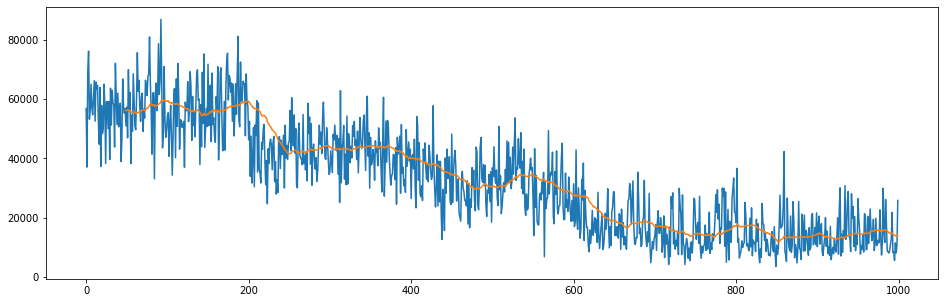

In [119]:
warehouse_log[warehouse_log.week==number_of_weeks-1].reset_index()['Total_Cost'].plot(figsize=(16,5))
warehouse_log[warehouse_log.week==number_of_weeks-1].reset_index()['Total_Cost'].rolling(50).mean().plot()

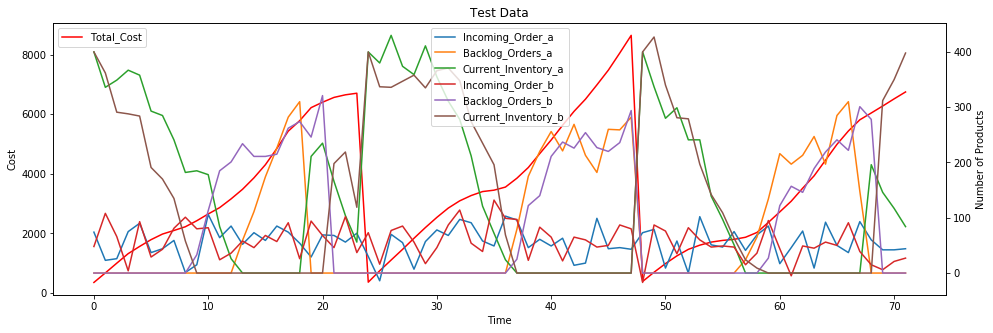

In [120]:
plt.title('Test Data')
ax1 = warehouse_log_test['Total_Cost'].plot(figsize=(16,5), color='r')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cost')
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Products')
warehouse_log_test['Incoming_Order_a'].plot()
warehouse_log_test['Backlog_Orders_a'].plot()
warehouse_log_test['Current_Inventory_a'].plot()
warehouse_log_test['Incoming_Order_b'].plot()
warehouse_log_test['Backlog_Orders_b'].plot()
warehouse_log_test['Current_Inventory_b'].plot()
plt.legend();

In [121]:
warehouse_log[warehouse_log.week==number_of_weeks-1].reset_index()['Current_Inventory'].plot(figsize=(16,5))
warehouse_log[warehouse_log.week==number_of_weeks-1].reset_index()['Current_Inventory'].rolling(50).mean().plot()
plt.legend();

KeyError: 'Current_Inventory'

In [113]:
warehouse_log[warehouse_log.week==number_of_weeks-1].reset_index()['Backlog_Orders'].plot(figsize=(16,5))
warehouse_log[warehouse_log.week==number_of_weeks-1].reset_index()['Backlog_Orders'].rolling(25).mean().plot()
plt.legend();

KeyError: 'Backlog_Orders'

KeyError: 'Incoming_Order'

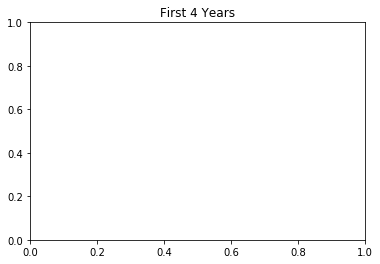

In [114]:
plt.title('First 4 Years')
ax1 = warehouse_log.iloc[:4*number_of_weeks].reset_index()['Incoming_Order'].plot(figsize=(16,5))
warehouse_log.iloc[:4*number_of_weeks].reset_index()['Outgoing_Order'].plot()
warehouse_log.iloc[:4*number_of_weeks].reset_index()['Current_Inventory'].plot()
plt.legend(loc=2);
ax2 = ax1.twinx()
ax2 = warehouse_log.iloc[:4*number_of_weeks].reset_index()['Backlog_Orders'].plot(color='r')
ax2.set_ylabel('Backlog Orders')
plt.legend(loc=1);

KeyError: 'Incoming_Order'

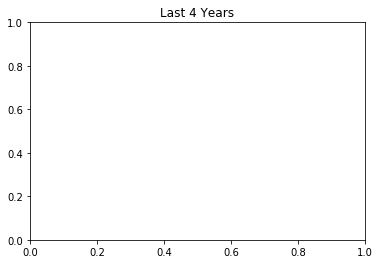

In [115]:
end=episodes*number_of_weeks
start=(episodes-4)*number_of_weeks

plt.title('Last 4 Years')
ax1 = warehouse_log.iloc[start:end].reset_index()['Incoming_Order'].plot(figsize=(16,5))
warehouse_log.iloc[start:end].reset_index()['Outgoing_Order'].plot()
warehouse_log.iloc[start:end].reset_index()['Current_Inventory'].plot()
plt.legend(loc=2);
ax2 = ax1.twinx()
ax2 = warehouse_log.iloc[start:end].reset_index()['Backlog_Orders'].plot(color='r')
ax2.set_ylabel('Backlog Orders')
plt.legend(loc=1);

## prediction

In [61]:
def max_dict(d):
    # returns the argmax (key) and max (value) from a dictionary
    max_value = np.max(d)
    max_key = np.argmax(d)
    return max_key, max_value


def predict_outgoing_order(inventory, backlog):
    s = min(n_bins, max(-n_bins, int((inventory - backlog)*n_bins/max_inventory)))
    print('Current State:', s)
    return all_possible_actions[max_dict(Q[s])[0]]


#Q = read_Q('C:/Users/abhinav.jhanwar/Documents/GMI/repository/Beer Game/Q_value.pickle')
outgoing_order = predict_outgoing_order(400, 0)
print('Please order:', outgoing_order)


Current State: 4
Please order: 10


## start playing beer game

In [36]:
EXE_PATH = r'C:\Users\abhinav.jhanwar\Downloads\chromedriver_win32 (1)\chromedriver.exe'
driver = webdriver.Chrome(executable_path=EXE_PATH)
driver.get('http://beergame.transentis.com/')
time.sleep(5)

# click on cockpit button
element = driver.find_element_by_class_name('button')
element.click()
time.sleep(5)

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [28]:
for i in range(23):
    all_spans = driver.find_elements_by_css_selector("div[class^='instrument']")
    # get incoming order from customer
    incoming_order = int(re.findall(r'[0-9]*', all_spans[1].text)[0])

    # get incoming delivery from plant
    incoming_delivery = int(re.findall(r'[0-9]*', all_spans[4].text)[0])

    # get current inventory
    inventory = int(re.findall(r'[0-9]*', all_spans[5].text)[0])

    # get backlog
    backlog = int(re.findall(r'[0-9]*', all_spans[2].text)[0])

    # get outgoing delivery
    outgoing_delivery = int(re.findall(r'[0-9]*', all_spans[6].text)[0])
    
    print('incoming delivery:', incoming_delivery)
    print('outgoing delivery:', incoming_delivery)
    print('incoming order:',incoming_order)
    print('backlog:', backlog)
    print('inventory:', inventory)
    
    if incoming_order >= inventory + incoming_delivery:
        backlog = backlog + incoming_order - outgoing_delivery
        inventory = 0
    elif incoming_order <= inventory + incoming_delivery - backlog:
        backlog = 0
        inventory = inventory + incoming_delivery - outgoing_delivery
    elif incoming_order > inventory + incoming_delivery - backlog:
        backlog= backlog + incoming_order - outgoing_delivery
        inventory = 0

    print('backlog:', backlog)
    print('inventory:', inventory)

    outgoing_order = predict_outgoing_order(inventory, backlog)
    print('outgoing order:', outgoing_order)

    # fill outgoing_order_value
    element = driver.find_element_by_xpath("//div[@class='input']")
    e2 = element.find_element_by_xpath(".//div")
    e2.send_keys(Keys.BACK_SPACE*4)
    e2.send_keys(outgoing_order)

    # click on order
    element = driver.find_elements_by_xpath("//button")
    element[0].click()

    time.sleep(1)


incoming delivery: 100
outgoing delivery: 100
incoming order: 100
backlog: 0
inventory: 400
backlog: 0
inventory: 400
Current State: 12
outgoing order: 100
incoming delivery: 100
outgoing delivery: 100
incoming order: 100
backlog: 0
inventory: 400
backlog: 0
inventory: 400
Current State: 12
outgoing order: 100
incoming delivery: 100
outgoing delivery: 100
incoming order: 400
backlog: 0
inventory: 400
backlog: 0
inventory: 100
Current State: 3
outgoing order: 600
incoming delivery: 100
outgoing delivery: 100
incoming order: 400
backlog: 0
inventory: 100
backlog: 200
inventory: 0
Current State: -6
outgoing order: 600
incoming delivery: 100
outgoing delivery: 100
incoming order: 400
backlog: 200
inventory: 0
backlog: 500
inventory: 0
Current State: -15
outgoing order: 500
incoming delivery: 500
outgoing delivery: 500
incoming order: 400
backlog: 500
inventory: 0
backlog: 400
inventory: 0
Current State: -12
outgoing order: 600
incoming delivery: 100
outgoing delivery: 100
incoming order: 4